Following the guide from https://developers.arcgis.com/python/guide/part3-spatial-operations-on-geometries/

NOTE: using OOP approach since it's using (free) local geometry system (`shapely` in my case) and not GIS servers

In [25]:
from arcgis.gis import GIS
from arcgis.geometry import Polygon, Geometry, Point, Polyline
from arcgis.geocoding import geocode

In [26]:
gis = GIS()

In [3]:
geom1_json = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'rings': [[[-8232647.749922129, 4978983.410862541], [-8232389.7749516675, 4978840.091434507], [-8232762.405464557, 4978161.712808477], [-8233001.2711779475, 4978295.477607976], [-8232647.749922129, 4978983.410862541]]]}
geom2_json = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'rings': [[[-8232619.086036522, 4978994.876241834], [-8232275.11940924, 4979644.590982256], [-8231988.480553171, 4979482.162297151], [-8232380.220323131, 4978822.892928192], [-8232619.086036522, 4978994.876241834]]]}

In [4]:
geom1 = Polygon(geom1_json)
geom2 = Polygon(geom2_json)

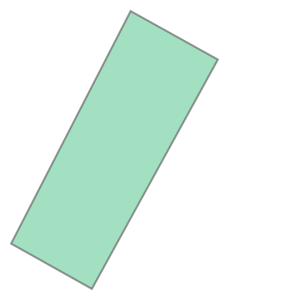

In [5]:
geom1

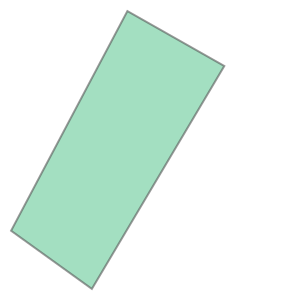

In [6]:
geom2

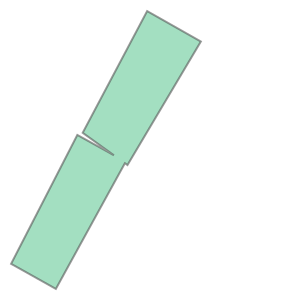

In [7]:
geom_union = geom1.union(geom2)
geom_union

In [8]:
geom3_json = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'rings': [[[-8233020.380435019, 4978303.121194171], [-8232303.783294846, 4979640.769189159], [-8232026.699067313, 4979497.449761124], [-8232791.069350163, 4978112.028623458], [-8233020.380435019, 4978303.121194171]]]}

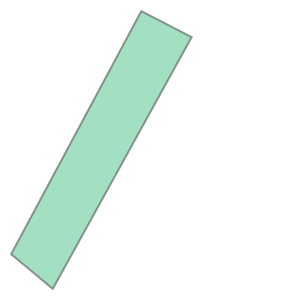

In [9]:
geom3 = Polygon(geom3_json)
geom3

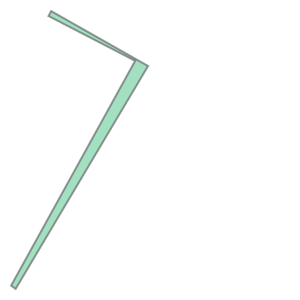

In [10]:
geom_diff = geom_union.difference(geom3)
geom_diff

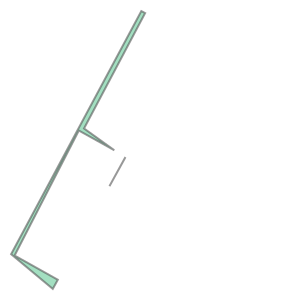

In [11]:
geom_diff1 = geom3.difference(geom_union)
geom_diff1

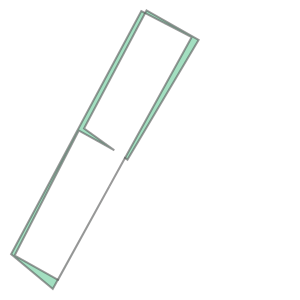

In [12]:
geom_sdiff = geom_union.symmetric_difference(geom3)
geom_sdiff

`second_geometry`: required `arcgis.geometry.Geometry`.

A second geometry `dimension`: required Integer. The topological dimension (shape type) of the resulting geometry, which can be
 
- 1: A zero-dimensional geometry (point or multipoint).
- 2: A one-dimensional geometry (polyline).
- 4: A two-dimensional geometry (polygon).

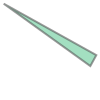

In [13]:
geom_intersection = geom1.intersect(second_geometry=geom2, dimension=4)
geom_intersection

In [16]:
# True, because the intersection of geom1 and geom2 is partial shape of geom1, and is not
# equivalent to either one
geom1.overlaps(geom2)

True

NOTE: `overlap` is false if one of the geometries is fully contained in another

In [17]:
# False, because the intersection of geom1 and geom_intersection is geom_intersection, 
# and that is equivalent to the second geometry
geom1.overlaps(geom_intersection)

False

NOTE: equals only checks 2D projection

In [18]:
geom1.equals(geom1)

True

In [19]:
geom_intersection.equals(geom_sdiff)

False

// I'm going to skip some steps about simplifying geometries via `generalize` and `buffer` here

## Finding a nearest point

The method `query_point_and_distance(second_geometry, use_percentage=False)` can find the point on a polyline nearest to the second_geometry and the distance between these points. It also returns information about which side of the line the second_geometry is on as well as the distance along the line where the nearest point occurs.

In [20]:
access_point = Point({'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 
                      'x': -8234818.501757936, 'y': 4978337.398475052})

In [21]:
access_polyline = Polyline({'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 
                            'paths': [[[-8234920.019686119, 4978251.645698531], [-8234885.38415768, 4978242.091069995], 
                                       [-8234849.554300674, 4978245.674055696], [-8234808.947129401, 4978255.228684231],
                                       [-8234773.117272396, 4978251.645698531], [-8234751.619358192, 4978239.702412861],
                                       [-8234736.093086823, 4978215.815841525]]]})

In [27]:
map1 = gis.map()
map1.basemap = "satellite"
map1.extent = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'xmin': -8235024.105413707,
 'ymin': 4978145.828180327,
 'xmax': -8234435.301430117,
 'ymax': 4978384.69389375}
map1

MapView(layout=Layout(height='400px', width='100%'))